In [77]:
import pandas as pd

In [78]:
H = pd.read_csv("hofmarcher_results.csv")
S = pd.read_csv("mean_auc_scores.csv")
results = H
results["Cel_counter_model"] = S["Cel_counter_model"]
results

,Assay,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN,Cel_counter_model
0,CHEMBL1040691,0.382,0.354,0.400,0.344,0.336,0.390,0.546,0.648375
1,CHEMBL1614544,0.714,0.687,0.679,0.722,0.725,0.616,0.606,0.530050
2,CHEMBL1613914,0.544,0.534,0.511,0.547,0.508,0.565,0.402,0.457325
3,CHEMBL1613836,0.492,0.466,0.448,0.461,0.503,0.401,0.511,0.343655
4,CHEMBL1613838,0.436,0.496,0.434,0.480,0.552,0.491,0.578,0.424992
...,...,...,...,...,...,...,...,...,...
204,CHEMBL3214913,0.839,0.881,0.856,0.764,0.731,0.799,0.623,0.470187
205,CHEMBL3214967,0.761,0.822,0.856,0.719,0.670,0.739,0.708,0.790890
206,CHEMBL3214906,0.562,0.650,0.547,0.482,0.574,0.550,0.483,0.760582
207,CHEMBL3214970,0.828,0.812,0.801,0.719,0.721,0.716,0.584,0.517021


In [79]:
results[results["Cel_counter_model"]==1]

,Assay,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN,Cel_counter_model


In [74]:
import numpy as np

# Calculate mean and standard deviation for each numeric column
stats = results.drop(columns=['Assay']).agg([np.mean, np.std]).transpose()
stats['mean+-std dev'] = stats['mean'].round(2).astype(str) + '+-' + stats['std'].round(2).astype(str)
stats

,mean,std,mean+-std dev
ResNet,0.731177,0.192322,0.73+-0.19
DenseNet,0.730388,0.189188,0.73+-0.19
GapNet,0.724703,0.192430,0.72+-0.19
M-CNN,0.705191,0.193273,0.71+-0.19
MIL-Net,0.711416,0.180503,0.71+-0.18
SC-CNN,0.705182,0.198565,0.71+-0.2
FNN,0.674856,0.197592,0.67+-0.2
Cel_counter_model,0.509878,0.120983,0.51+-0.12


In [75]:

# Create DataFrame
df = results

# Function to count values above a threshold
def count_above_threshold(column, threshold):
    return (df[column] >= threshold).sum()

# Define thresholds
thresholds = [0.9, 0.8, 0.7]

# Calculate counts for each model and threshold
count_data = {}
for col in df.columns[1:]:  # Exclude 'Assay' and 'CHEMBL_ID'
    count_data[col] = {f'>{threshold}': count_above_threshold(col, threshold) for threshold in thresholds}

# Convert the results to a DataFrame
count_df = pd.DataFrame(count_data).transpose()

count_df


,>0.9,>0.8,>0.7
ResNet,66,85,114
DenseNet,65,93,113
GapNet,60,88,115
M-CNN,59,71,100
MIL-Net,58,72,100
SC-CNN,63,71,104
FNN,54,69,78
Cel_counter_model,0,0,14


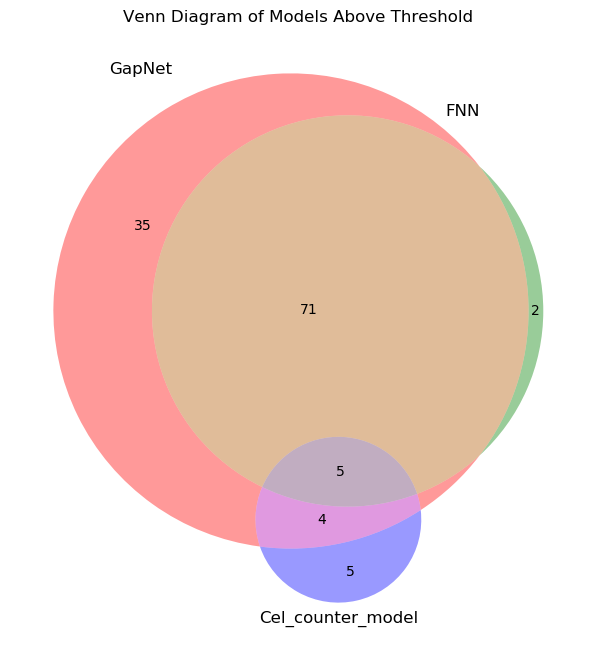

In [76]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3



# Define threshold
threshold = 0.7

# Get sets of indices for each model where the values are above the threshold
densenet_set = set(df.index[df['GapNet'] > threshold])
fnn_set = set(df.index[df['FNN'] > threshold])
cellcounter_set = set(df.index[df['Cel_counter_model'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn3([densenet_set, fnn_set, cellcounter_set], ('GapNet', 'FNN', 'Cel_counter_model'))
plt.title('Venn Diagram of Models Above Threshold')
plt.show()
